In [17]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [47]:
movies_data = pd.read_csv(r"C:\Users\sheej.DESKTOP-SDF1007\OneDrive\Documents\data\MoviesOnStreamingPlatforms\MoviesOnStreamingPlatforms_updated.csv")

In [24]:
movies_data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [26]:
movies_data.Year.unique()

array([2010, 1999, 2018, 1985, 1966, 2002, 2012, 1981, 2009, 1976, 2006,
       2015, 1975, 1968, 1989, 1993, 2013, 2007, 1979, 2019, 2011, 2016,
       2003, 1986, 2005, 2008, 1984, 2014, 1971, 1997, 1990, 2020, 2017,
       2004, 2001, 1988, 1996, 1995, 1973, 1982, 2000, 1998, 1992, 1994,
       1987, 1991, 1978, 1980, 1983, 1946, 1977, 1972, 1945, 1942, 1943,
       1944, 1947, 1962, 1974, 1960, 1959, 1964, 1967, 1963, 1954, 1949,
       1923, 1950, 1955, 1951, 1953, 1957, 1902, 1926, 1922, 1920, 1940,
       1969, 1936, 1958, 1928, 1916, 1925, 1965, 1932, 1961, 1937, 1941,
       1939, 1919, 1915, 1948, 1952, 1933, 1921, 1927, 1970, 1934, 1924,
       1938, 1929, 1956, 1931, 1918, 1930, 1935, 1912, 1917, 1913],
      dtype=int64)

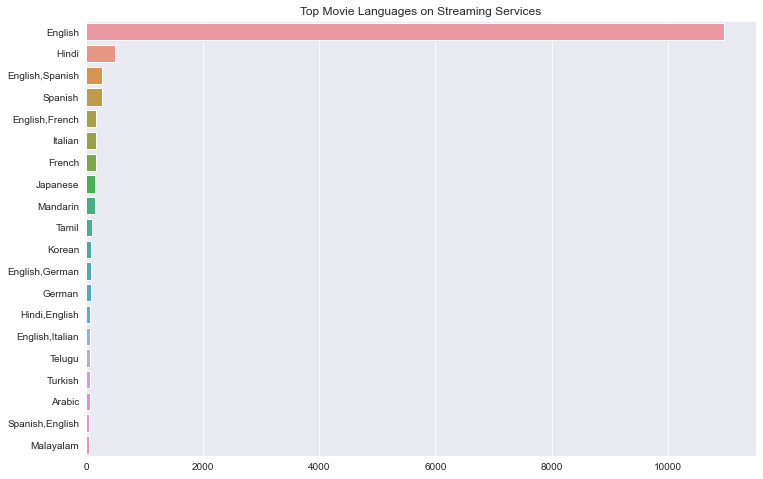

In [55]:
#counting and assigning the 20 top values to a variable
languages = movies_data.Language.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('Top Movie Languages on Streaming Services')
sns.barplot(x=languages.values, y=languages.index)
plt.savefig('Top20Languages.png', dpi=250)

In [31]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [32]:
#creating a new dataframe with the splitmulticolumn function
genres_df = split_multicolumn(movies_data.Genres)

#performing a sum operation of all True values
movie_genres = genres_df.sum().sort_values(ascending=False)

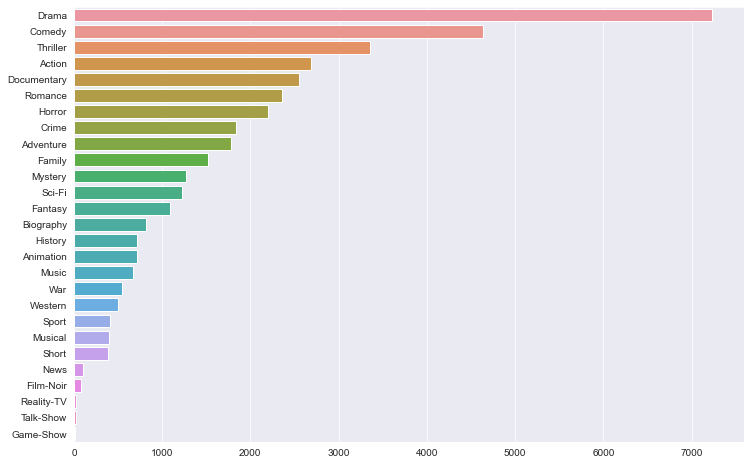

In [49]:
#plotting into a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);
plt.savefig('Genres.png', dpi=250)

In [42]:
#Creating different dataframes for each platform
Hulu_df = movies_data.loc[(movies_data['Hulu'] > 0) ]
Disney_df = movies_data.loc[(movies_data['Disney+'] > 0) ]
PrimeVideo_df = movies_data.loc[(movies_data['Prime Video'] > 0)  ]
Netflix_df = movies_data.loc[(movies_data['Netflix'] > 0)  ]

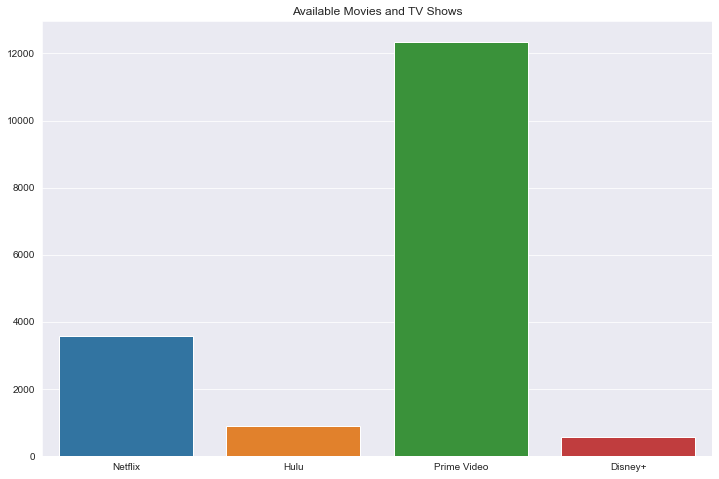

In [50]:
#Selecting the specific columns from the Dataset and saving into a new dataframe
chosen_columns = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platforms_df = movies_data[chosen_columns]

#Counting all values for each platform
platforms = platforms_df.sum()

#Plotting into a bar plot using Seaborn

plt.figure(figsize=(12,8))
plt.title('Available Movies and TV Shows')

sns.barplot(x=platforms.index, y=platforms.values);
plt.savefig('MoviesandTVShows.png', dpi=250)